### Deadly Syrian Migration Routes to Europe 

This notebook explores migration data set and examines the most deadly routes for Syrians migrating to Europe.  

We'll start by exploring the variables in the data set, doing a little data carpentry, and look for key insights.  I'm pretty new to data science and welcome all your feedback.  I would ideally like to model the data so if you have any suggestions on how to approach this using the data set, please let me know.  Also if anyone else has any ideas on how to improve the analysis please leave your comments below.  Thanks in advance! 

Let's get started. 

In [1]:
library(ggplot2) 
library(readr) 
library(tidyverse)
library(dplyr)
library(gridExtra)
library(grid)
library(ggthemes)
library(RColorBrewer)
library(ggfortify)
library(rworldmap)

missing <- read_csv("../input/MissingMigrantsProject.csv")
head(missing)
str(missing)
summary(missing) 

# I'm going to simplify the column names just a bit 
colnames(missing) <- c('id', 'cause_death', 'origin', 'nationality', 'missing', 'dead', 'incident_location', 'date', 'source', 'reliability', 'lat', 'lon')

# check out your new column names
names(missing)

Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: purrr
Loading tidyverse: dplyr


Conflicts with tidy packages ---------------------------------------------------


filter(): dplyr, stats
lag():    dplyr, stats



Attaching package: ‘gridExtra’



The following object is masked from ‘package:dplyr’:

    combine



Loading required package: sp


### Welcome to rworldmap ###


For a short introduction type : 	 vignette('rworldmap')


Parsed with column specification:
cols(
  id = col_double(),
  cause_of_death = col_character(),
  region_origin = col_character(),
  affected_nationality = col_character(),
  missing = col_double(),
  dead = col_double(),
  incident_region = col_character(),
  date = col_character(),
  source = col_character(),
  reliability = col_character(),
  lat = col_double(),
  lon = col_double()
)


id,cause_of_death,region_origin,affected_nationality,missing,dead,incident_region,date,source,reliability,lat,lon
1,Presumed drowning,Middle East,Iraq,1,1,Mediterranean,05/11/2015,IOM Greece,Verified,36.89150,27.28770
3,Fell from train,Central America & Mexico,Honduras,NA,1,Central America incl. Mexico,03/11/2015,La Jornada,Partially Verified,15.95640,-93.66310
4,Presumed drowning,Middle East,NA,NA,1,Mediterranean,03/11/2015,Hellenic Coast Guard,Verified,36.50439,27.36325
6,Drowning,MENA,NA,6,4,Mediterranean,01/11/2015,Reuters,Partially Verified,37.28560,27.08660
7,Vehicle accident,South East Asia,Cambodia,NA,4,Southeast Asia,01/11/2015,Phnom Penh Post,Partially Verified,13.36110,100.98500
8,Drowning,MENA,NA,NA,11,Mediterranean,01/11/2015,Hellenic Coast Guard,Verified,37.75181,26.96029


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2420 obs. of  12 variables:
 $ id                  : num  1 3 4 6 7 8 9 10 11 12 ...
 $ cause_of_death      : chr  "Presumed drowning" "Fell from train" "Presumed drowning" "Drowning" ...
 $ region_origin       : chr  "Middle East" "Central America & Mexico" "Middle East" "MENA" ...
 $ affected_nationality: chr  "Iraq" "Honduras" NA NA ...
 $ missing             : num  1 NA NA 6 NA NA NA NA 0 NA ...
 $ dead                : num  1 1 1 4 4 11 1 1 3 1 ...
 $ incident_region     : chr  "Mediterranean" "Central America incl. Mexico" "Mediterranean" "Mediterranean" ...
 $ date                : chr  "05/11/2015" "03/11/2015" "03/11/2015" "01/11/2015" ...
 $ source              : chr  "IOM Greece" "La Jornada" "Hellenic Coast Guard" "Reuters" ...
 $ reliability         : chr  "Verified" "Partially Verified" "Verified" "Partially Verified" ...
 $ lat                 : num  36.9 16 36.5 37.3 13.4 ...
 $ lon                 : num  27.3 -93.7 27.4 27.1 10

       id         cause_of_death     region_origin      affected_nationality
 Min.   :     1   Length:2420        Length:2420        Length:2420         
 1st Qu.: 28571   Class :character   Class :character   Class :character    
 Median :121178   Mode  :character   Mode  :character   Mode  :character    
 Mean   : 95926                                                             
 3rd Qu.:144678                                                             
 Max.   :184750                                                             
                                                                            
    missing            dead         incident_region        date          
 Min.   :  0.00   Min.   :  0.000   Length:2420        Length:2420       
 1st Qu.:  3.00   1st Qu.:  1.000   Class :character   Class :character  
 Median : 10.00   Median :  1.000   Mode  :character   Mode  :character  
 Mean   : 39.66   Mean   :  4.729                                        
 3rd Qu.: 33.0

[1] "id"                "cause_death"       "origin"           
 [4] "nationality"       "missing"           "dead"             
 [7] "incident_location" "date"              "source"           
[10] "reliability"       "lat"               "lon"

###**Part 1: Data Cleaning and Initial Exploration** 

Let's clean up some of the NAs are located in the dataframe 

In [1]:
# we have a lot of NAs for columns with missing and dead counts and most other columns look pretty good.  
# we will clean this up a little bit focusing first on columns with numbers.  

missing[c("missing", "dead", "date", "lat", "lon")][is.na(missing[c("missing", "dead", "date", "lat", "lon")])] <- 0

summary(missing)
str(missing)

       id         cause_death           origin          nationality       
 Min.   :     1   Length:2420        Length:2420        Length:2420       
 1st Qu.: 28571   Class :character   Class :character   Class :character  
 Median :121178   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 95926                                                           
 3rd Qu.:144678                                                           
 Max.   :184750                                                           
    missing             dead        incident_location      date          
 Min.   :  0.000   Min.   :  0.00   Length:2420        Length:2420       
 1st Qu.:  0.000   1st Qu.:  1.00   Class :character   Class :character  
 Median :  0.000   Median :  1.00   Mode  :character   Mode  :character  
 Mean   :  4.441   Mean   :  4.53                                        
 3rd Qu.:  0.000   3rd Qu.:  3.00                                        
 Max.   :750.000   Max.   :750.

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2420 obs. of  12 variables:
 $ id               : num  1 3 4 6 7 8 9 10 11 12 ...
 $ cause_death      : chr  "Presumed drowning" "Fell from train" "Presumed drowning" "Drowning" ...
 $ origin           : chr  "Middle East" "Central America & Mexico" "Middle East" "MENA" ...
 $ nationality      : chr  "Iraq" "Honduras" NA NA ...
 $ missing          : num  1 0 0 6 0 0 0 0 0 0 ...
 $ dead             : num  1 1 1 4 4 11 1 1 3 1 ...
 $ incident_location: chr  "Mediterranean" "Central America incl. Mexico" "Mediterranean" "Mediterranean" ...
 $ date             : chr  "05/11/2015" "03/11/2015" "03/11/2015" "01/11/2015" ...
 $ source           : chr  "IOM Greece" "La Jornada" "Hellenic Coast Guard" "Reuters" ...
 $ reliability      : chr  "Verified" "Partially Verified" "Verified" "Partially Verified" ...
 $ lat              : num  36.9 16 36.5 37.3 13.4 ...
 $ lon              : num  27.3 -93.7 27.4 27.1 101 ...
 - attr(*, "spec")=List of 2
  ..$ co

Let's first clean up the date column.  

In [1]:
library(lubridate) 

#output looks like  we are working with a day / month / year format

missing$date <- dmy(missing$date)
str(missing$date) # view changes 

summary(missing) # looks like there's a few dates with NAs that were introduced do to some messy data. 
# Let's clean up our other columns and we'll come back to this.  
# Dropping these 9 rows might be easiest if there's something odd going on with these dates. 



Attaching package: ‘lubridate’



The following object is masked from ‘package:base’:

    date



Warning message:
“ 9 failed to parse.”

 Date[1:2420], format: "2015-11-05" "2015-11-03" "2015-11-03" "2015-11-01" "2015-11-01" ...


       id         cause_death           origin          nationality       
 Min.   :     1   Length:2420        Length:2420        Length:2420       
 1st Qu.: 28571   Class :character   Class :character   Class :character  
 Median :121178   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 95926                                                           
 3rd Qu.:144678                                                           
 Max.   :184750                                                           
                                                                          
    missing             dead        incident_location       date           
 Min.   :  0.000   Min.   :  0.00   Length:2420        Min.   :2014-01-06  
 1st Qu.:  0.000   1st Qu.:  1.00   Class :character   1st Qu.:2015-10-17  
 Median :  0.000   Median :  1.00   Mode  :character   Median :2016-04-03  
 Mean   :  4.441   Mean   :  4.53                      Mean   :2016-03-04  
 3rd Qu.:  0.000   3

Now examine the NA situation in our data set.  We'll summarize the NAs in each column.  Nationality seems to be the column containing the most NAs.  We can view this in a number of different ways.  

In [1]:
library(dplyr)
missing %>% 
    group_by(origin) %>%   
    summarise_each(funs(sum(is.na(.))))


# That is a large proportion of the number of records in the data
sum(is.na(missing$origin))
sum(is.na(missing$source))
sum(is.na(missing$reliability))
sum(is.na(missing$nationality))

`summarise_each()` is deprecated.
Use `summarise_all()`, `summarise_at()` or `summarise_if()` instead.
To map `funs` over all variables, use `summarise_all()`


origin,id,cause_death,nationality,missing,dead,incident_location,date,source,reliability,lat,lon
Caribbean,0,9,8,0,0,0,0,0,0,0,0
Central America,0,44,179,0,0,1,1,0,2,0,0
Central America & Mexico,0,22,162,0,0,0,0,0,1,0,0
East Asia,0,0,0,0,0,0,0,0,0,0,0
Horn of Africa,0,9,169,0,0,0,0,0,0,0,0
Horn of Africa (P),0,0,477,0,0,0,0,0,312,0,0
MENA,0,6,53,0,0,2,2,0,2,0,0
Middle East,0,1,3,0,0,0,0,0,0,0,0
Middle East/ South Asia,0,1,35,0,0,0,0,1,0,0,0
Mixed,0,5,37,0,0,0,0,0,0,0,0


[1] 443

[1] 7

[1] 324

[1] 1575

For our analysis I'd rather have unknown as a value for some of these columns with NAs or missing values.  For some of these we're dealing with locations and nationalities.  We can assume we just don't know where these people are from or where they went missing/died.  

In [1]:
# This code below just cleans up our NA situation by replacing the values, ultimately putting "unknown" in columns with characters that had many NAs
missing[c("origin")][is.na(missing[c("origin")])] <- 0
missing[c("nationality")][is.na(missing[c("nationality")])] <- 0
missing[c("incident_location")][is.na(missing[c("incident_location")])] <- 0
missing[c("reliability")][is.na(missing[c("reliability")])] <- 0
missing[c("source")][is.na(missing[c("source")])] <- 0

missing$origin <- gsub("0", "Unknown", missing$origin)
missing$nationality <- gsub("0", "Unknown", missing$nationality)
missing$incident_location <- gsub("0", "Unknown", missing$incident_location)
missing$reliability <- gsub("0", "Unknown", missing$reliability)
missing$source <- gsub("0", "Unknown", missing$source)

# for simplicity I'm just going to drop those 9 NAs in the date column. 
missing <- missing %>% filter(!is.na(date))

Now let's examine the regions in the data set where people go missing or die.  The code below shows that most people die or go missing around the Mediterranean. This seems to match what we're hearing in the news and helps contextualize all the stories we hear about refugees drowning in the Mediterranean sea.   

In [1]:
regions <- missing %>% 
    group_by(incident_location) %>% 
    summarise(sum(missing), sum(dead))

regions <- as.data.frame(regions)
colnames(regions) <- c('incident_location', 'missing', 'dead')
regions <- arrange(regions, dead)
regions$incident_location <- factor(regions$incident_location, levels = regions$incident_location[order(regions$dead)])

regions
  

incident_location,missing,dead
North America,0,1
Unknown,0,1
East Asia,17,2
South America,0,35
Caribbean,212,111
Middle East,11,190
Europe,0,230
Central America incl. Mexico,0,421
Sub-Saharan Africa,31,426
Horn of Africa,172,512


Let's go ahead and plot this table.  

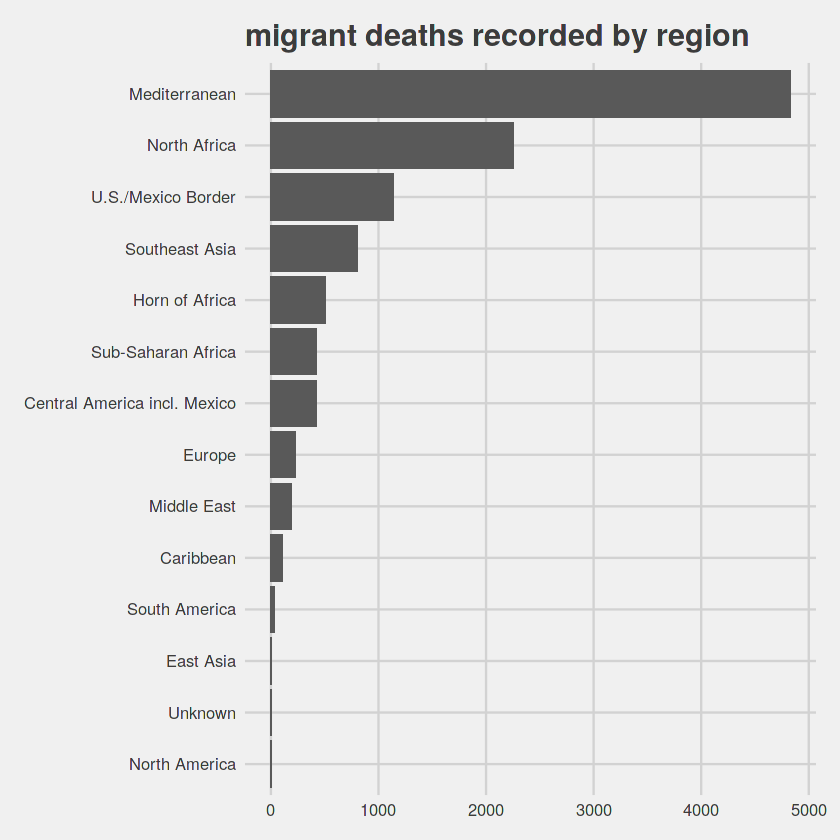

In [1]:
library(ggplot2)
# Look at the distribution of deaths by region 
p <- ggplot(regions, aes(x=incident_location, y=dead)) + 
  geom_bar(stat ='identity') + 
  coord_flip() + 
  ggtitle("migrant deaths recorded by region") +
  theme_fivethirtyeight() 

p

Now we plot the missing persons (migrants) by region where they went missing.  The Mediterranean region stands out. 

The plots clearly show the Mediterranean as a location of interest. The incidents of missing persons and deaths in the Mediterranean are much greater than any other location throughout the world.  North Africa is another region that sticks out here with a large number of recorded deaths.  

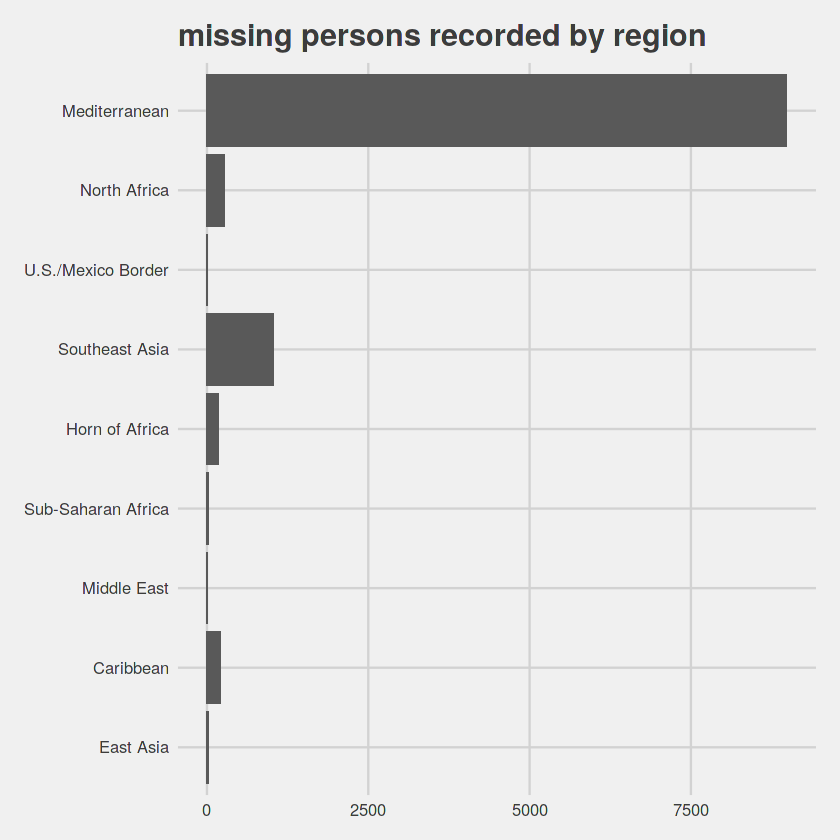

In [1]:
# clean and plot missing persons by region 
missing_sums <- subset(regions, missing >= 1)

p1 <- ggplot(missing_sums, aes(x=incident_location, y=missing)) + 
  geom_bar(stat ='identity') + 
  coord_flip() + 
  ggtitle("missing persons recorded by region") +
  theme_fivethirtyeight() 

p1

After further exploration of the original csv file we notice  a large number of records for North Africa were left blank.  That's why they were filled with "unknown" earlier in this workbook.  Going forward we are going to assume that these "unknown" values which were left blank in the original data set should be "unverified".  We're going to swap out "unknown" for "unverified".

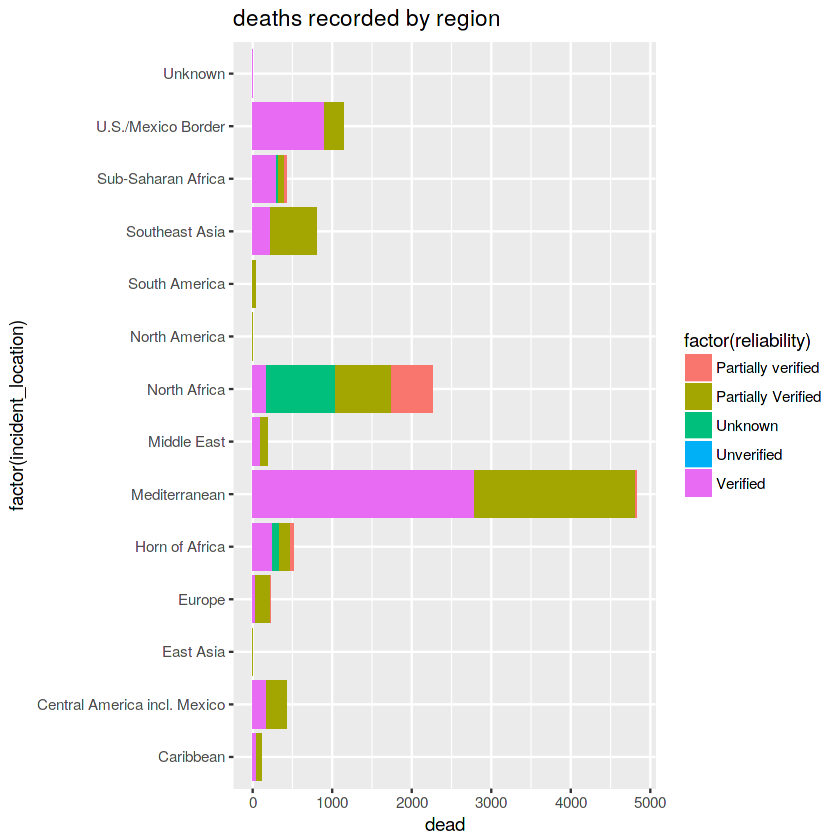

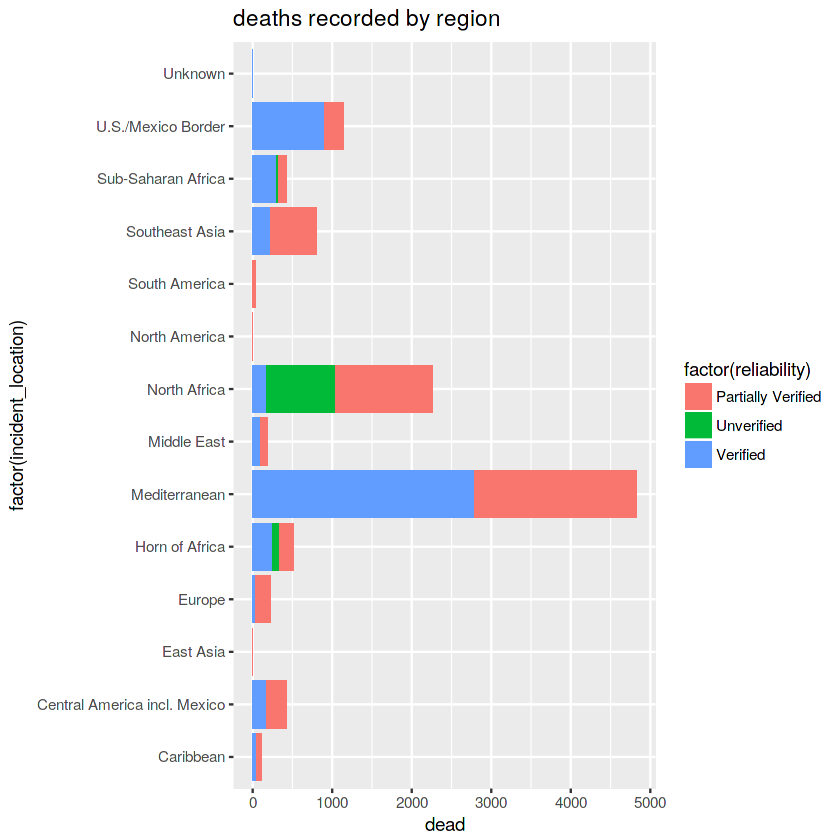

In [1]:
p2 <- ggplot(missing, aes(x=factor(incident_location), y=dead, fill=factor(reliability))) +
     geom_bar(stat = 'identity') +
     coord_flip() +
     ggtitle("deaths recorded by region")
     
p2    

# we have an "unknown" value in this column.  For this analysis "unverified" is more appropriate.  
missing$reliability <- gsub("Unknown", "Unverified", missing$reliability)


# We also notice that we have a spelling issue with "partially verified" when 
# the data set was created. One was created with caps and one without. We'll want to fix this.  

missing$reliability <- gsub("Partially verified", "Partially Verified", missing$reliability)


#plot again to view the updates.  This is looking better. 
p3 <- ggplot(missing, aes(x=factor(incident_location), y=dead, fill=factor(reliability))) +
     geom_bar(stat = 'identity') +
     coord_flip() +
     ggtitle("deaths recorded by region")
     
p3    

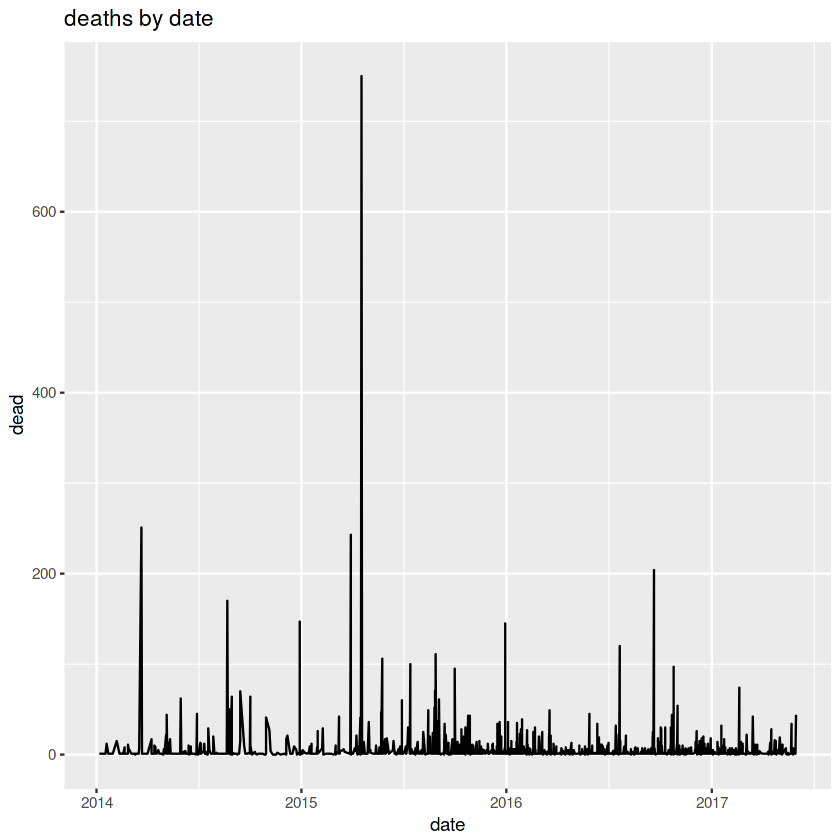

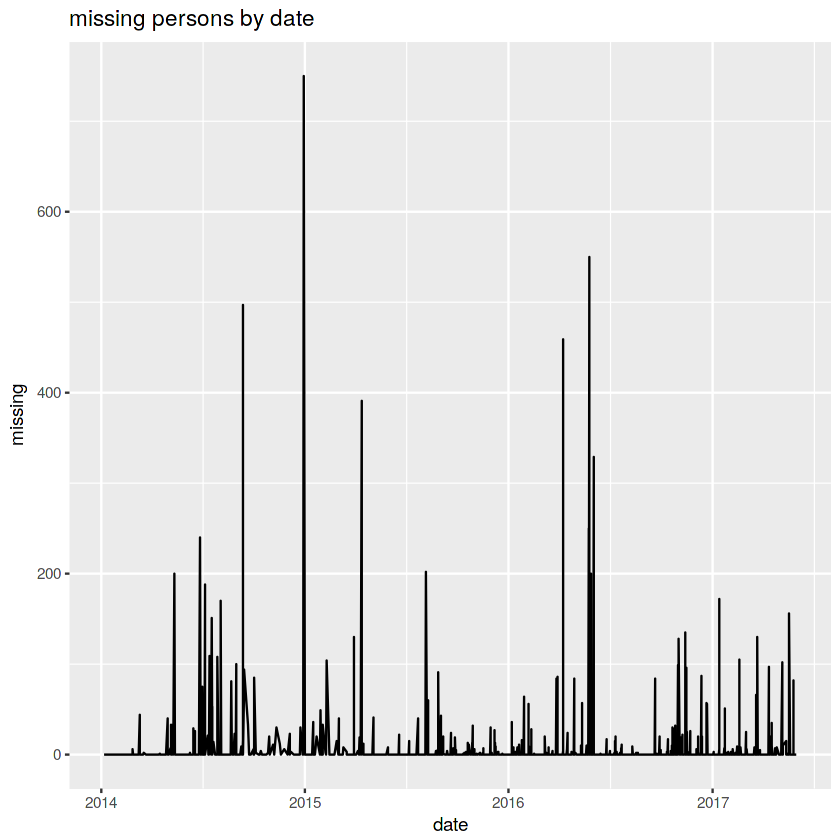

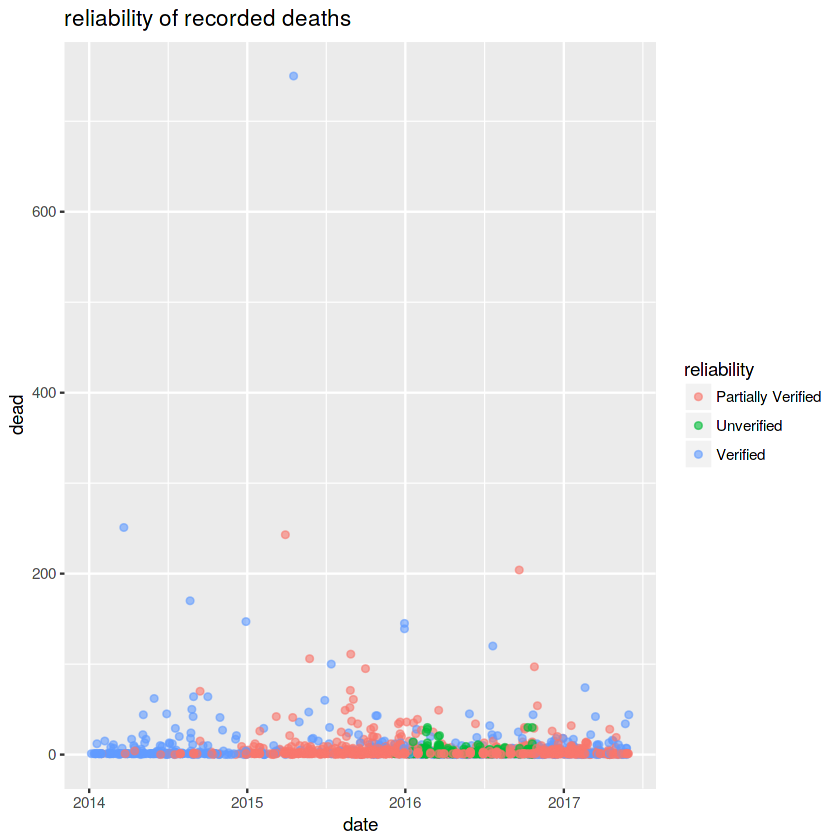

In [1]:
# plot missing persons and deaths over time 

#deaths by date
p4 <- ggplot(missing, aes(x=date, y=dead)) + 
  geom_line() +
  ggtitle("deaths by date")
p4

# missing persons by date
p5 <- ggplot(missing, aes(x=date, y=missing)) + 
  geom_line() +
  ggtitle("missing persons by date")
p5

#Let's plot the dead variable over time and show the reliablity feature.  
# We can see that the unverified or unknown data was documented in 2016.
p6 <- ggplot(missing, aes(x=date, y=dead)) + 
    geom_point(aes(col=reliability), alpha=0.6) +
    ggtitle('reliability of recorded deaths')
p6



View number or records for region of origin. Origin seems to be a good variable in the data set.  Not only do we see this here when we count the records, but we also notice that the IOM focuses on this variable when presenting their data to the public. That's a good sign. 

In [1]:
origin_reg <- missing %>% group_by(origin) %>% count()


origin_reg <- as.data.frame(origin_reg)
head(origin_reg, 20)

origin,n
Caribbean,57
Central America,267
Central America & Mexico,344
East Asia,3
Horn of Africa,241
Horn of Africa (P),477
MENA,197
Middle East,29
Middle East/ South Asia,46
Mixed,45


The Nationality column is a pretty messy column.  I'm liking the region of origin variable after exploring how Nationality is tracked in the data set.  

We've got about 220 categories of nationalities.  Some are duplicates like 'Mexico' and 'Mexican'.  Others have some ethnic suggestions to them such as 'Myanmar' and 'Myanmar (Rohingya)'.  Others vary like categories for Syria such as Syria', 'Syrian' and 'Syria Arab Republic'... even 'African' and 'Sub-Saharan'...wondering how accurate these categories actually are...could a sub-saharan nationality been classified as 'African' when the data set was created? I'm even seeing some columns with multiple nationalities and ethnicities listed. Cleaning this up is going to take some time. There are also a lot of unknowns in this column - 1567 to be exact.  Still hard to tell how much value can be derived from this column given how messy it is and the amount of unknowns. 

In [1]:
nations <- missing %>% 
    group_by(nationality) %>%   
    count()
nations <- as.data.frame(nations)
head(nations, 20) 

nationality,n
'African',2
'Mostly African',1
'Sub-Saharan African',2
"1 Honduran, 3 Mexican",1
"1 Nigerian, others unknown. Survivors all from Sub-Saharan Africa",1
"1 Venezuelan, 1 unknown",1
"13 Cuba, 1 Dominican Republic, 1 Colombia",1
"15 dead from Palestine. Missing are from Palestine, Syria, and Egypt",1
2 from Niger,1
"2 Senegal, 2 Guinea, 1 Ghana",1


### Let's focus on the tricky cause of death column. Here we see hundreds of causes of death. 

The cause of death column has 290 different categorical variables.  There appear to be some variables that are the same with different spellings.  Others appear to have a lot of detail, but this detail is going to be difficult for anyone to make sense of when looking for patterns in the data.  It would be great if they used some type of standard classification method here to make sense of what's going on.  Going forward we're going to need to clean this up, address the spelling issues, and collapse certain categories.  

Before we get started I found this helpful resource from IOM.  
resource: https://missingmigrants.iom.int/sites/default/files/gmdac_data_briefing_series_issue4.pdf 

On page 5 of their report, the missing migrants project seems to have collapsed or at least they are presenting the causes of death in a limited number of categories.  This is a helpful start.  When collapsing variable values we'll try use this structure as a starting point and see how far we get.  

Before we start cleaning let's look at all the cause of death.  

In [1]:
count <- missing %>% 
    group_by(cause_death) %>%  
    count()

count <- as.data.frame(count)
head(count, 20) # limit the print because there are too many 

cause_death,n
"AH1N1 influenza virus, while stuck at border",1
Asphyxiation,5
Asphyxiation (Silica sand inhalation),1
Asphyxiation and crushing,1
Assaulted by smugglers,1
Attacked by hippopotamus,2
Beat-up and killed,1
Beat-up and thrown into river,1
Beaten to death on train,1
Beating/shot by traffickers,2


As a first step let's just take out the records we're not interested.  These include records from other regions.  Cleaning up that cause of death column is going to take some time and since we're focused on the Mediterranean region, let's just subset the data.  

The incident location will be a key variable allowing us to examine the Mediterranean region in more detail.  

In [1]:
# subset the dataframe to the following regions: Europe, Mediterranean, Middle East, North Africa
missing_med <- subset(missing, incident_location == "Europe" | incident_location == "Mediterranean" | incident_location == "Middle East" | incident_location =="North Africa")

#check the data set.  We're down to 1415 variables.  
str(missing_med)
regions <- missing_med %>% group_by(incident_location) %>% summarise(sum(missing), sum(dead))
regions

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1415 obs. of  12 variables:
 $ id               : num  1 4 6 8 9 10 11 12 13 14 ...
 $ cause_death      : chr  "Presumed drowning" "Presumed drowning" "Drowning" "Drowning" ...
 $ origin           : chr  "Middle East" "Middle East" "MENA" "MENA" ...
 $ nationality      : chr  "Iraq" "Unknown" "Unknown" "Unknown" ...
 $ missing          : num  1 0 6 0 0 0 0 0 0 7 ...
 $ dead             : num  1 1 4 11 1 1 3 1 1 3 ...
 $ incident_location: chr  "Mediterranean" "Mediterranean" "Mediterranean" "Mediterranean" ...
 $ date             : Date, format: "2015-11-05" "2015-11-03" ...
 $ source           : chr  "IOM Greece" "Hellenic Coast Guard" "Reuters" "Hellenic Coast Guard" ...
 $ reliability      : chr  "Verified" "Verified" "Partially Verified" "Verified" ...
 $ lat              : num  36.9 36.5 37.3 37.8 38.4 ...
 $ lon              : num  27.3 27.4 27.1 27 26.5 ...


incident_location,sum(missing),sum(dead)
Europe,0,230
Mediterranean,8989,4826
Middle East,11,190
North Africa,275,2257


### Below are the new cause of death categories: 

 1. Drowning
 2. Medical 
 3. Asphyxiation 
 4. Vehicle Accident
 5. Train Accident
 6. Violence, Assault, Murder
 7. Exhaustion Starvation, Dehydration, Exposure
 8. Sexual Assault
 9. Accident
 10. Unknown



In [1]:
# this was a bit tedious to reclassify these as appropriate. 

cleanup <- function(df) {
    df <- gsub("Boat fire","Accident",df)
    df <- gsub("Asphyxiation and crushing", "Asphyxiation",df)
    df <- gsub("Beat-up and killed", "Violence, Assault, Murder",df)
    df <- gsub("Burned to death hiding in truck", "Vehicle Accident",df)
    df <- gsub("Burns and Suffocation", "Asphyxiation",df)
    df <- gsub("Burns from cooking gas explosion in connection house in Libya", "Accident",df)
    df <- gsub("Clubbed/beaten to death","Violence, Assault, Murder",df)
    df <- gsub("Crushed","Accident",df)
    df <- gsub("Crushed / drowning","Drowning",df)
        df <- gsub("Boat","Accident",df)
    df <- gsub("Accident / drowning","Accident",df)
    df <- gsub("Accident by bus on ferry","Accident",df)
    df <- gsub("Accident by pallets","Accident",df)
    df <- gsub("Accident to death","Accident",df)
    df <- gsub("Dehydration","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Dehydration and exposure to the elements","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Dehydration Harsh_weather_lack_of_adequate_shelter","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Dehydration Harsh_weather_lack_of_adequate_shelter Suffocation Excessive_physical_abuse Sexual_abuse","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Dehydration Suffocation Vehicle_Accident","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Dehydration Vehicle_Accident Excessive_physical_abuse","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Dehydration, Starvation","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Died of unknown cause in hospital shortly after rescue","Unknown",df)
    df <- gsub("drowning","Drowning",df)
    df <- gsub("Drowning after being thrown overboard by other passengers","Drowning",df)
    df <- gsub("Drowning or suffocation in hull","Drowning",df)
    df <- gsub("Drowning, Asphyxiation","Drowning",df)
    df <- gsub("Drowning, Other","Drowning",df)
    df <- gsub("Drowning, Trampling","Drowning",df)
    df <- gsub("Drowning. Boat collided with ferry","Drowning",df)
    df <- gsub("Electrocuted on train","Train Accident",df)
    df <- gsub("Electrocution","Accident",df)
    df <- gsub("Electrocution on railway","Train Accident",df)
    df <- gsub("Excessive_physical_abuse","Violence, Assault, Murder",df)
    df <- gsub("Excessive_physical_abuse Sexual_abuse","Sexual Assault",df)
    df <- gsub("Excessive_physical_abuse Shot_or_Stabbed","Violence, Assault, Murder",df)
    df <- gsub("Exposure","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Exposure, Hyperthermia","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Exposure. Died upon entry to refugee camp.","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Fell from boat","Accident",df)
    df <- gsub("Fell from train","Train Accident",df)
    df <- gsub("Fell from truck","Vehicle Accident",df)
    df <- gsub("Fuel burns","Accident",df)
    df <- gsub("Fuel Inhalation","Asphyxiation",df)
    df <- gsub("Gylcemic crisis (Diabetic, medicine thrown overboard)","Medical",df)
    df <- gsub("Harsh conditions","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Harsh_weather_lack_of_adequate_shelter","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Harsh_weather_lack_of_adequate_shelter Excessive_physical_abuse Sexual_abuse","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Harsh_weather_lack_of_adequate_shelter Other","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Harsh_weather_lack_of_adequate_shelter Suffocation Vehicle_Accident","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Harsh_weather_lack_of_adequate_shelter Vehicle_Accident","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Head injury","Accident",df)
    df <- gsub("Head injury from fall","Accident",df)
    df <- gsub("Head trauma (hit by boat propeller)","Accident",df)
    df <- gsub("Hi by truck","Vehicle Accident",df)
    df <- gsub("Hit by car","Vehicle Accident",df)
    df <- gsub("Hit by train","Train Accident",df)
    df <- gsub("Hit by truck","Vehicle Accident",df)
    df <- gsub("Hit by vehicle","Vehicle Accident",df)
    df <- gsub("Hit by Vehicle","Vehicle Accident",df)
    df <- gsub("Homicide, likely by asphyxiation","Violence, Assault, Murder",df)
    df <- gsub("Hunger, fatigue","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Hyperthermia","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Hyperthermia, Abandoned by smugglers in the desert","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Hyperthermia, starvation","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Hypothermia, Exhaustion","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Hypothermia, Malnutrition","Accident",df)
    df <- gsub("Inhalation of toxic fumes from boat engine","Accident",df)
    df <- gsub("Injured from a fight","Violence, Assault, Murder",df)
    df <- gsub("Killed","Violence, Assault, Murder",df)
    df <- gsub("NA","Unknown",df)
    df <- gsub("Presumed Drowning","Drowning",df)
    df <- gsub("Hypothermia","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Unknown (found on motorway)","Unknown",df)
    df <- gsub("Unspecified location between North Africa and Italy. Body brought to Calabria.","Unknown",df)
    df <- gsub("Starvation, Exhaustion, Starvation, Dehydration, Exhaustion, Starvation, Dehydration, Exposure, Exhaustion","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Exhaustion, Starvation, Dehydration, Exposure, Abandoned by smugglers in the desert","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Toxic fumes/asphyxiation","Asphyxiation",df)
    df <- gsub("Shot","Violence, Assault, Murder ",df)
    df <- gsub("Plane stowaway","Unknown",df)
    df <- gsub("Suffocation, Trampled","Asphyxiation",df)
    df <- gsub("Pulmonary edema","Medical",df)
    df <- gsub("Suffocation","Asphyxiation",df)
    df <- gsub("Unknown (body recovered from boat)","Unknown",df)
    df <- gsub("Unknown (found dead on top of train)","Unknown",df)
    df <- gsub("Unknown (body recovered from boat)","Unknown",df)
    df <- gsub("Presumed asphyxiation","Asphyxiation",df)
    df <- gsub("Vehicle accident","Vehicle Accident",df)
    df <- gsub("Gylcemic crisis (Diabetic, medicine thrown overboard)","Medical",df)
    df <- gsub("Unknown, plane stowaway","Unknown",df)
    df <- gsub("Violent robbery","Violence, Assault, Murder",df)
    df <- gsub("Meningitis","Medical",df)
    df <- gsub("Exhaustion, Starvation, Dehydration, Exposure, hypothermia","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Accident from fall","Accident",df)
    df <- gsub("Accident on railway","Train Accident",df)
    df <- gsub("Asphyxiation Vehicle_Accident","Asphyxiation",df)
    df <- gsub("Asphyxiation, Other","Asphyxiation",df)
    df <- gsub("Drowning. Accident collided with ferry","Drowning",df)
    df <- gsub("Drowning. Accident collided with ferry","Unknown",df)
    df <- gsub("Exhaustion, Exhaustion, Starvation, Dehydration, Exposure, Exhaustion, Starvation, Dehydration, ","Exhaustion, Starvation, Dehydration, Exposure",df)
    df <- gsub("Likely Drowning ","Drowning",df)
    df <- gsub("Lung infection","Medical",df)
    
    return(df)
}

# this function helps, but there's still a lot of categories that need cleaning.  
missing_med$cause_death <- cleanup(missing_med$cause_death)


# further cleaning up this column using using a more flexible technique. 
missing_med$cause_death[startsWith(missing_med$cause_death, "Exhaustion")] <- "Exhaustion, Starvation, Dehydration, Exposure"
missing_med$cause_death[startsWith(missing_med$cause_death, "Starvation")] <- "Exhaustion, Starvation, Dehydration, Exposure"
missing_med$cause_death[startsWith(missing_med$cause_death, "Violence")] <- "Violence, Assault, Murder"
missing_med$cause_death[startsWith(missing_med$cause_death, "Sickness")] <- "Medical"
missing_med$cause_death[startsWith(missing_med$cause_death, "Gylcemic")] <- "Medical"
missing_med$cause_death[startsWith(missing_med$cause_death, "Head trauma")] <- "Medical"
missing_med$cause_death[startsWith(missing_med$cause_death, "Likely suffocation")] <- "Asphyxiation"
missing_med$cause_death[startsWith(missing_med$cause_death, "Murdered")] <- "Violence, Assault, Murder"
missing_med$cause_death[startsWith(missing_med$cause_death, "Likely Drowning")] <- "Drowning"
missing_med$cause_death[startsWith(missing_med$cause_death, "On board violence")] <- "Unknown"
missing_med$cause_death[startsWith(missing_med$cause_death, "Plane Stowaway")] <- "Unknown"
missing_med$cause_death[startsWith(missing_med$cause_death, "Presumed dehydration")] <- "Exhaustion, Starvation, Dehydration, Exposure"
missing_med$cause_death[startsWith(missing_med$cause_death, "Other")] <- "Unknown"
missing_med$cause_death[startsWith(missing_med$cause_death, "Presumed violence")] <- "Violence, Assault, Murder"
missing_med$cause_death[startsWith(missing_med$cause_death, "Probable Drowning")] <- "Drowning"
missing_med$cause_death[startsWith(missing_med$cause_death, "Respiratory problem")] <- "Medical"
missing_med$cause_death[startsWith(missing_med$cause_death, "Road accident")] <- "Vehicle Accident"
missing_med$cause_death[startsWith(missing_med$cause_death, "Sexual_abuse")] <- "Sexual Assault"
missing_med$cause_death[startsWith(missing_med$cause_death, "Tekeze River, near Himora, Ethiopia")] <- "Unknown"
missing_med$cause_death[startsWith(missing_med$cause_death, "Train accident")] <- "Sexual Assault"
missing_med$cause_death[startsWith(missing_med$cause_death, "Stabbed")] <- "Violence, Assault, Murder"
missing_med$cause_death[startsWith(missing_med$cause_death, "Truck crash")] <- "Vehicle Accident"
missing_med$cause_death[startsWith(missing_med$cause_death, "Unclear")] <- "Unknown"
missing_med$cause_death[startsWith(missing_med$cause_death, "Vehicle incident")] <- "Vehicle Accident"
missing_med$cause_death[startsWith(missing_med$cause_death, "Vehicle_Accident")] <- "Vehicle Accident"
missing_med$cause_death[startsWith(missing_med$cause_death, "Undernourished")] <- "Exhaustion, Starvation, Dehydration, Exposure"
missing_med$cause_death[startsWith(missing_med$cause_death, "Unknown")] <- "Unknown"
missing_med$cause_death[startsWith(missing_med$cause_death, "unknown")] <- "Unknown"

# We've got some leftover NAs encoded as <NA> in the data.  The normal na removal code isn't 
# working so this bit tranforms things and changes these to unknown.  
missing_med$cause_death[is.na(missing_med$cause_death)] <- 0
missing_med$cause_death <- gsub(0,"Unknown", missing_med$cause_death)


# View new cause of death categories and sum the missing persons and death counts 
missing_med %>% 
    group_by(cause_death) %>% 
    summarise(sum(missing), sum(dead))


cause_death,sum(missing),sum(dead)
Accident,15,37
Asphyxiation,5,334
Drowning,8953,4157
"Exhaustion, Starvation, Dehydration, Exposure",33,744
Medical,0,821
Sexual Assault,0,18
Suicide,0,1
Train Accident,0,18
Unknown,269,428
Vehicle Accident,0,489


### Part 2: Data Exploration 

In this second part we'll focus more on exploring our data and less on cleaning and data manipulation.  We will start by looking at the data spatially.  The data set contains latitude and longitude coordinates so we'll start to visualize and map the data to see if we find any useful insights.  

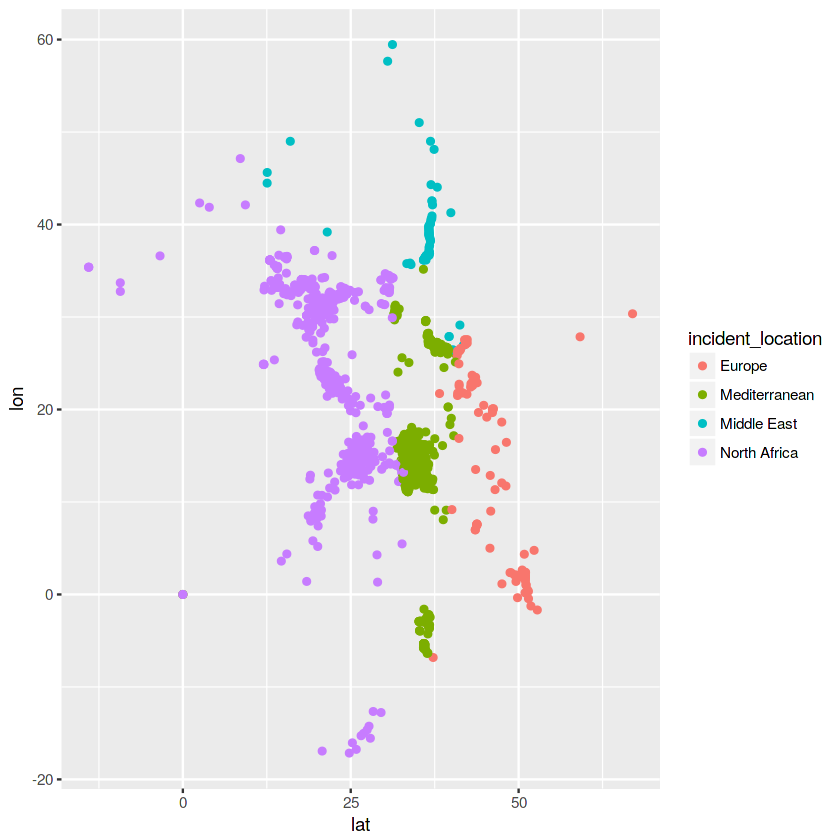

In [1]:
# plot the lat and lon cords and show regional classifications 
location_plot <- ggplot(missing_med, aes(x = lat, y = lon), col=incident_location) + geom_point(aes(col=incident_location))
location_plot

I want to give credit here to www.kaggle.com/jonathanbouchet/missing-migrants-data notebook.  
I'm using his mapping method here ggforitfy.  I'm more familiar with the google ggmap plots, but since kaggle limits connections to the internet to pull the maps I'm trying a new approach.  I still like my google maps and am hopeful kaggle will support more google products in the future. 

In [1]:
library(gridExtra)
library(grid)
library(ggthemes)
library(RColorBrewer)
library(ggfortify)
library(rworldmap)

worldMap <- fortify(map_data("world"), region = "region")

map <-ggplot() + 
  geom_map(data = worldMap, map = worldMap,aes(x = long, y = lat, map_id = region, group = group),fill = "white", color = "black", size = 0.25)


Attaching package: ‘maps’



The following object is masked from ‘package:purrr’:

    map



Warning message:
“Ignoring unknown aesthetics: x, y”

Warning message:
“Ignoring unknown aesthetics: aplpha”

Warning message:
“Removed 6 rows containing missing values (geom_point).”

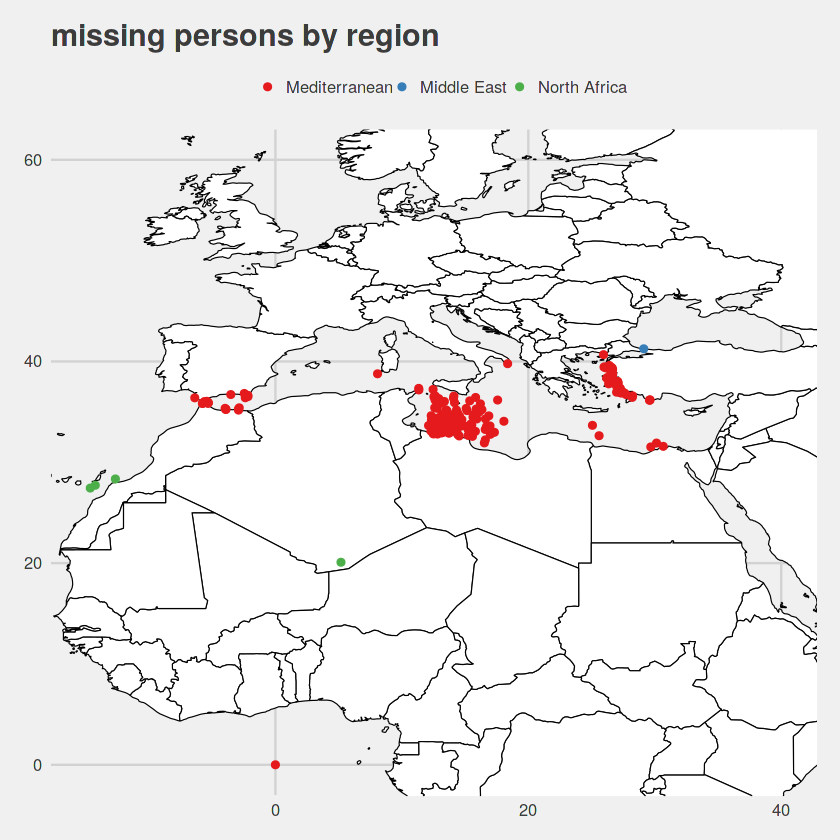

In [1]:
# look at our missing persons records on a map 
med_missing_p <- subset(missing_med, missing >= 1)
map + geom_point(aes(x = lon, y = lat, aplpha=0.5, col=factor(incident_location)), data = med_missing_p) +
    theme_fivethirtyeight() + 
    scale_color_brewer(name='',palette='Set1') + 
    theme(legend.position='top') + 
    xlab('') + ylab('') + xlim(-15,40) + ylim(0,60) +
    ggtitle('missing persons by region')


Warning message:
“Ignoring unknown aesthetics: aplpha”

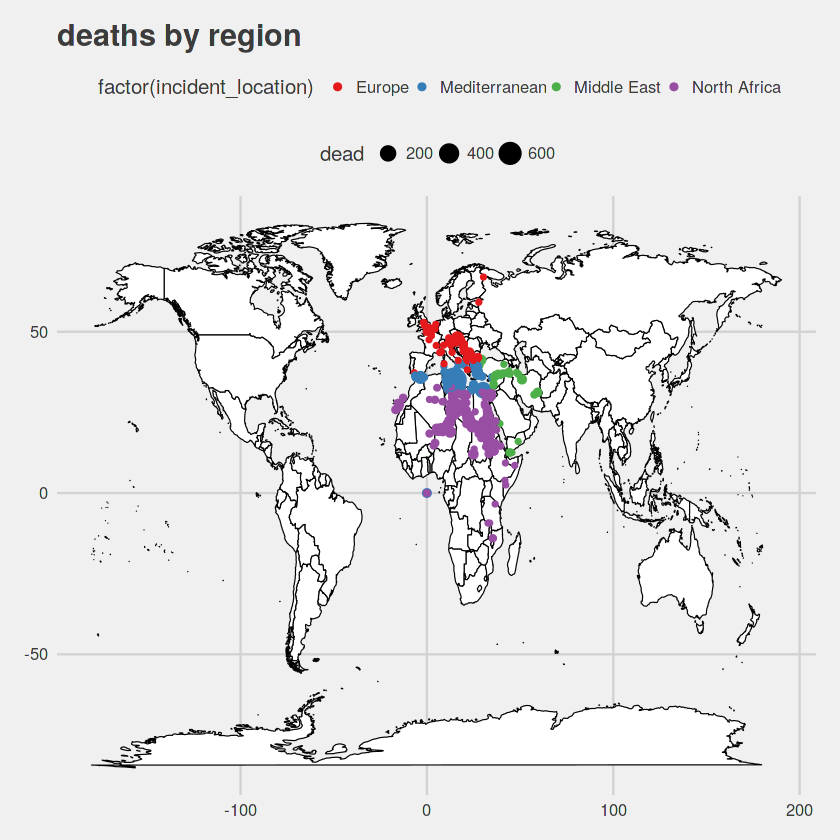

In [1]:
# view the location of deaths 
med_dead <- subset(missing_med, dead >= 1)
map + geom_point(aes(x = lon, y = lat, aplpha=0.5, col=factor(incident_location), size=dead), data = med_dead) +
      theme_fivethirtyeight() + 
      scale_color_brewer(palette='Set1') + 
      theme(legend.position='top') + xlab('') + ylab('') + 
      ggtitle('deaths by region')


Now let's look at the location of the "Unverified" deaths in the dataset.  These records tend to be clustered in southern Libya, Egypt, and Sudan.  


Warning message:
“Ignoring unknown aesthetics: aplpha”

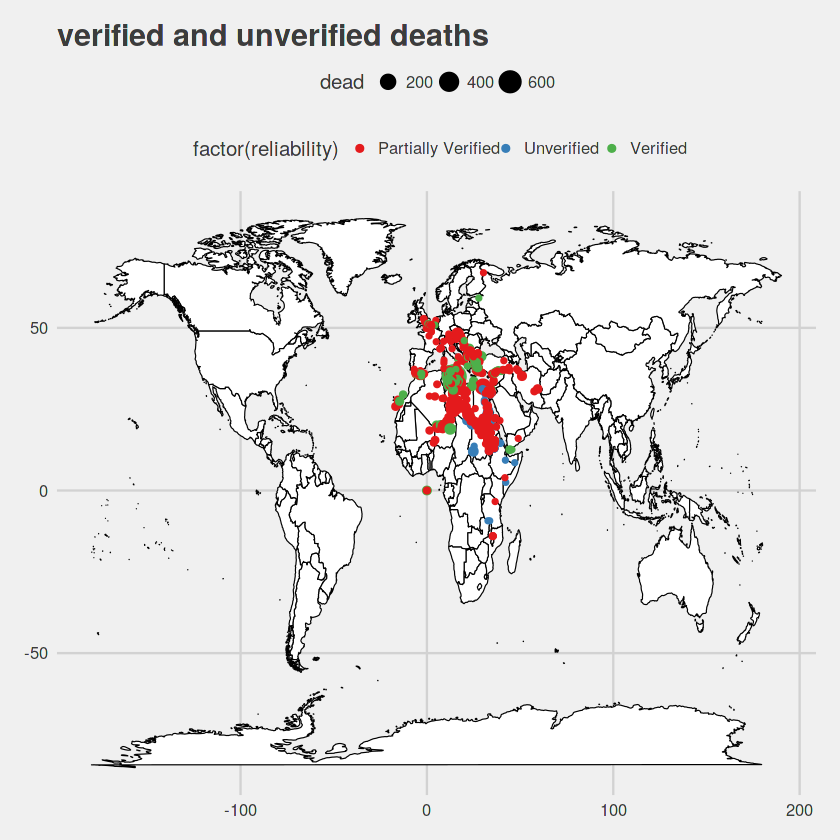

In [1]:
map + geom_point(aes(x = lon, y = lat, aplpha=0.5, col=factor(reliability), size=dead), data = med_dead) +
      theme_fivethirtyeight() + 
      scale_color_brewer(palette='Set1') + 
      theme(legend.position='top') + xlab('') + ylab('') +
      ggtitle('verified and unverified deaths')


Now let's look at the location of the "Unverified" missing persons recorded in the dataset. It looks like we don't have any "Unverified" records classifed as "missing persons" in the dataset. All of these seem to be verified or at least partially verified.  

Warning message:
“Ignoring unknown aesthetics: aplpha”

Warning message:
“Removed 6 rows containing missing values (geom_point).”

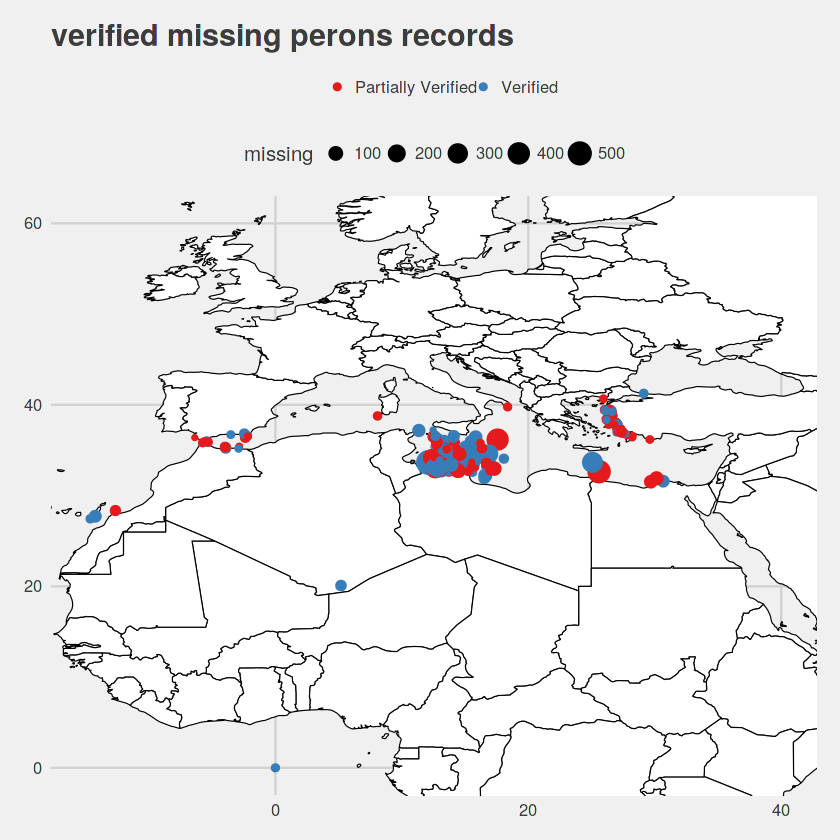

In [1]:
map + geom_point(aes(x = lon, y = lat, aplpha=0.5, col=factor(reliability), size=missing), data = med_missing_p) +
    theme_fivethirtyeight() + 
    scale_color_brewer(name='',palette='Set1') + 
    theme(legend.position='top') + 
    xlab('') + ylab('') + xlim(-15,40) + ylim(0,60) +
    ggtitle('verified missing perons records')

### Part 3: Feature Engineering 

Now we are going to add another feature called migration route. This new feature is closely related to incident location. However, we're breaking thigs down a little more based on information from Frontex and IOM defined migration routes. According to Frontex and IOM several migration routes exist around the Mediterranean Sea.  

I think these breaks represent a good start, but they could probably be improved if you had more specialized knowledge of the routes.

Warning message:
“Ignoring unknown aesthetics: aplpha”

Warning message:
“Removed 39 rows containing missing values (geom_point).”

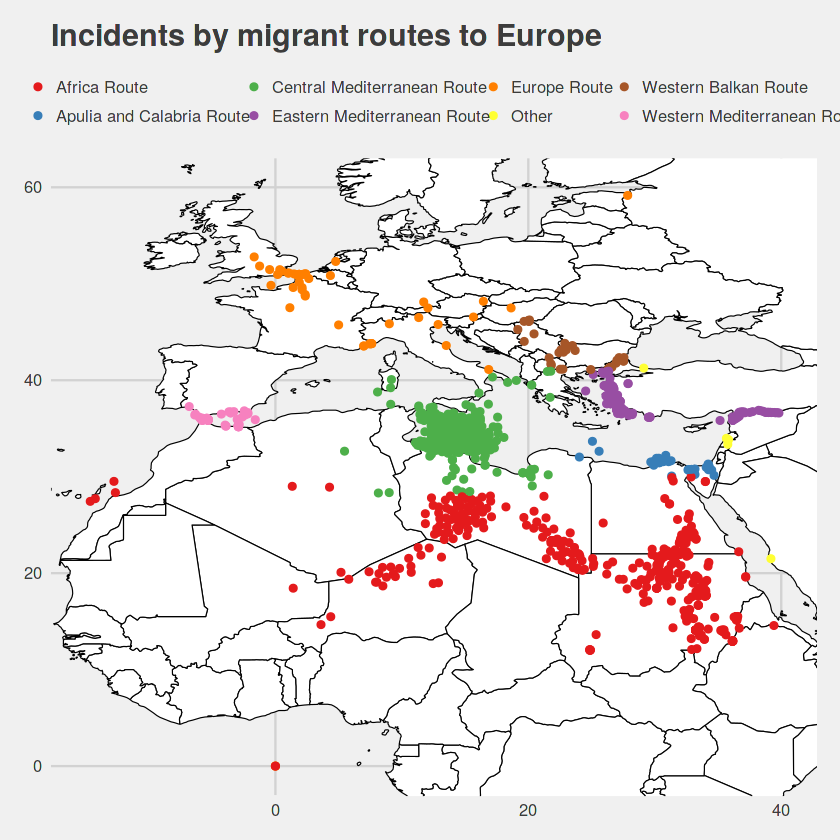

In [1]:
# define the space for routes using the lat and lon coords and incident location 
missing_med$route <- ifelse((missing_med$lat <= 40) & (missing_med$lat >= 30) & (missing_med$lon <= 5) & (missing_med$lon >= -20), "Western Mediterranean Route",
                      ifelse((missing_med$lat <= 41) & (missing_med$lat >= 28) & (missing_med$lon >= 5) & (missing_med$lon <= 22), "Central Mediterranean Route", 
                      ifelse((missing_med$lat <= 35) & (missing_med$lat >= 30) & (missing_med$lon >= 20 ) & (missing_med$lon <= 35), "Apulia and Calabria Route",
                      ifelse((missing_med$lat <= 41) & (missing_med$lat >= 35) & (missing_med$lon >= 20) & (missing_med$lon <= 80), "Eastern Mediterranean Route", 
                      ifelse((missing_med$lat >= 41) & (missing_med$lat <= 47) & (missing_med$lon >= 18) & (missing_med$lon <= 28), "Western Balkan Route", 
                      ifelse((missing_med$incident_location == "North Africa") | (missing_med$incident_location == "Sub-Saharan Africa"), "Africa Route", 
                      ifelse((missing_med$incident_location == "Europe"), "Europe Route","Other")))))))

# plot the new routes on a map to see if they make sense.  
map + geom_point(aes(x = lon, y = lat, aplpha=0.5, col=factor(route)), data = missing_med) +
    theme_fivethirtyeight() + 
    scale_color_brewer(name='',palette='Set1') + 
    theme(legend.position='top') + 
    xlab('') + ylab('') + xlim(-15,40) + ylim(0,60) +
    ggtitle('Incidents by migrant routes to Europe')

### Part 4: Findings 

The next part will explore key findings from the dataset.  



### Central Mediterranean Sea route is the most dangerous migration route.  
The plot below shows missing persons by route.  It appears many migrants go missing on the Central Mediterranean route south of Italy. 

Warning message:
“Ignoring unknown aesthetics: aplpha”

Warning message:
“Removed 10 rows containing missing values (geom_point).”

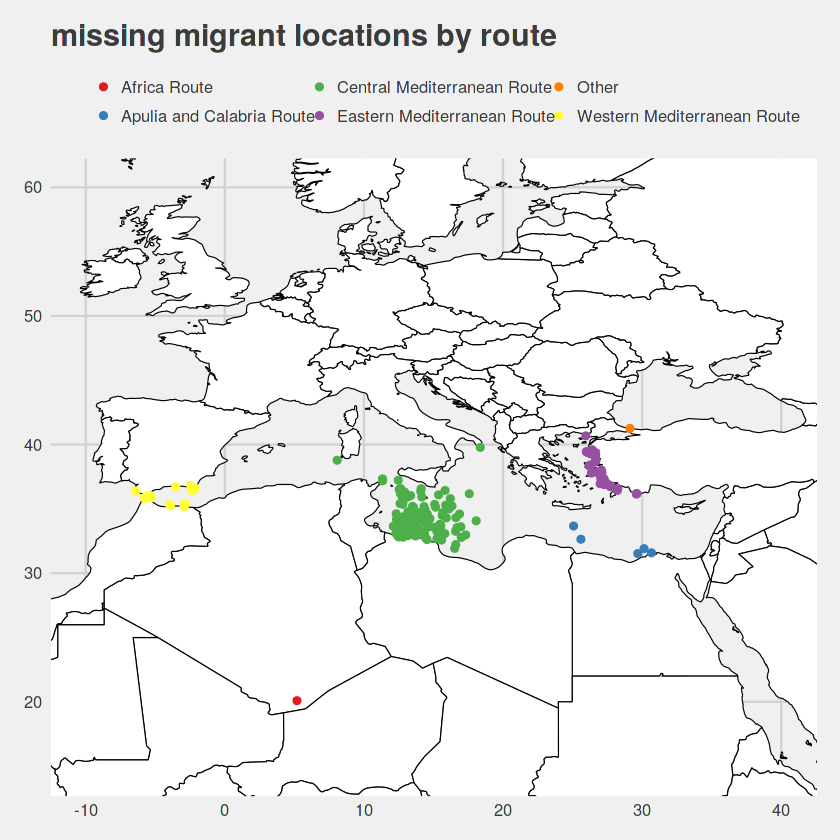

In [1]:
# plot missing persons by route 
missing_people <- subset(missing_med, missing >= 1)
missing_route_map <- map + geom_point(aes(x = lon, y = lat, aplpha=0.5, col=factor(route)), data = missing_people) +
    theme_fivethirtyeight() + 
    scale_color_brewer(name='',palette='Set1') + 
    theme(legend.position='top') + 
    xlab('') + ylab('') + xlim(-10,40) + ylim(15,60) +
    ggtitle('missing migrant locations by route')
missing_route_map 

Now let's look at the origin of those migrants dying by migration route to Europe.  The central med route stands out, but it is hard to tell exactly where these people come from.  The values "mixed" and and "Unknown" are high.  Sub-Saharan Africa stands out here with a high number of deaths on the central med route.  This finding might be valuable to those looking to prevent deaths along specific migrant routes.   

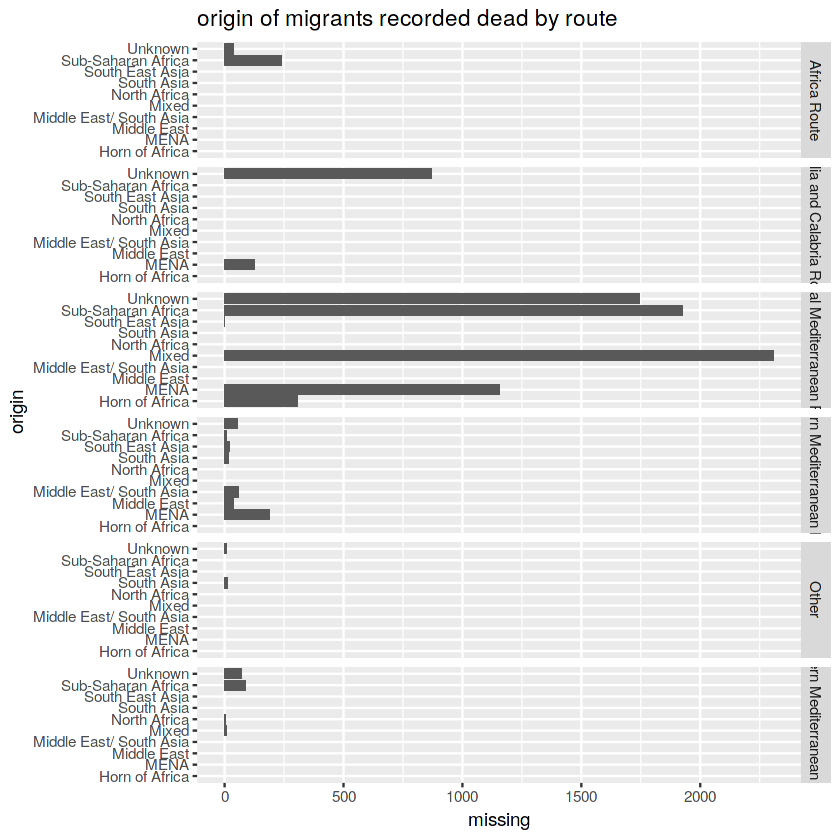

In [1]:
ggplot(missing_people, aes(x=origin, y=missing)) +
     geom_bar(stat = 'identity') +
     coord_flip() +
     ggtitle("origin of migrants recorded dead by route") +
     facet_grid(route ~ .)



Let's narrow our focus a bit to look at incidents of drowning and those that are Syrian.  

Here we create a few more features for our data set.

In [1]:
# create a new data frame just in case we want to go back and try something else.  
df <- missing_med 

# create a new True/False Feature for drowning 
df$drown <- ifelse((missing_med$cause_death == "Drowning"), "TRUE", "FASLE")

# The nationality column is pretty messey as well. We'll try a simple fix, but if we want 
df$nationality[startsWith(df$nationality, "Syr")] <- "Syrian"

# better information this column is going to need to be cleaned.  
nation <- df %>% 
    group_by(nationality == 'Syrian') %>% 
    summarise(sum(missing), sum(dead))

nation



"nationality == ""Syrian""",sum(missing),sum(dead)
FALSE,8110,6211
TRUE,1165,1292


In [1]:
# create a true/false feature for Syrian 
df$syrian <- ifelse((df$nationality == "Syrian"), "TRUE", "FASLE")

nation <- df %>% 
    group_by(syrian == 'TRUE') %>% 
    summarise(sum(missing), sum(dead))

nation

"syrian == ""TRUE""",sum(missing),sum(dead)
FALSE,8110,6211
TRUE,1165,1292


### About 20 percent of all deaths are Syrian 

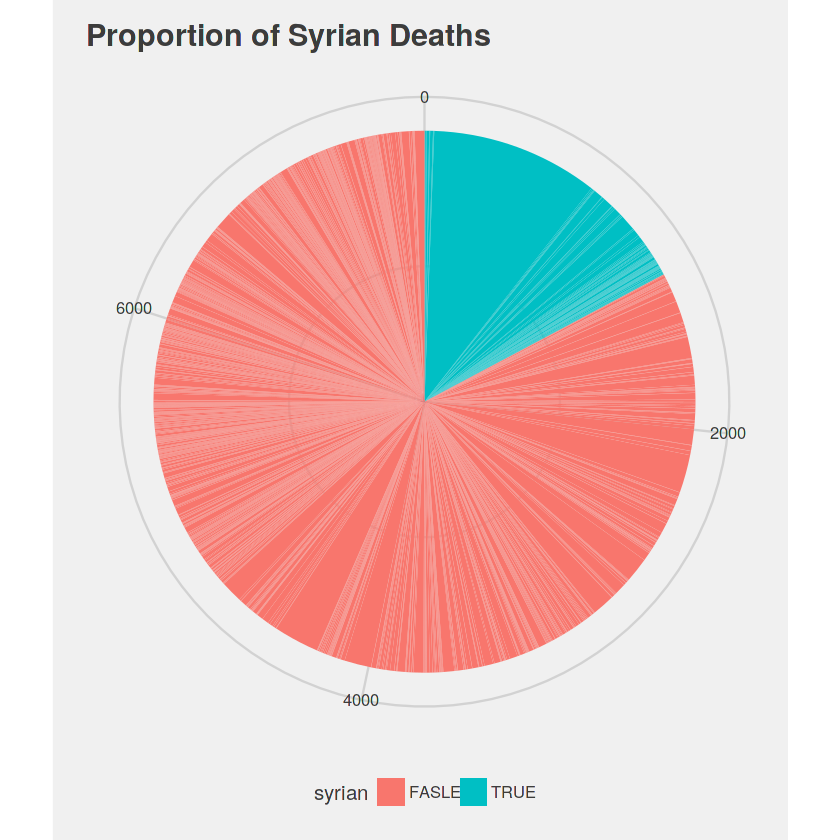

In [1]:
pie <- ggplot(df, aes(x="", y=dead, fill=syrian)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y", start=0) +
    theme_fivethirtyeight() + 
    ggtitle('Proportion of Syrian Deaths')
pie


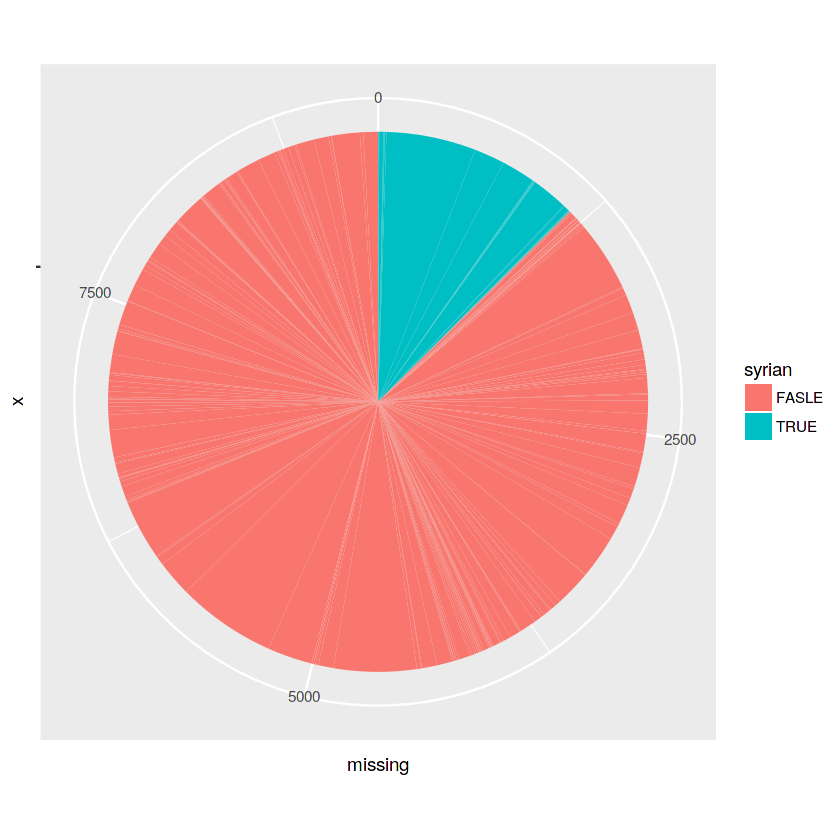

In [1]:
bp <- ggplot(df, aes(x="", y=missing, fill=syrian)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y", start=0)
bp


### Now look at which migration routes where Syrians go missing



Warning message:
“Ignoring unknown aesthetics: aplpha”

Warning message:
“Removed 10 rows containing missing values (geom_point).”

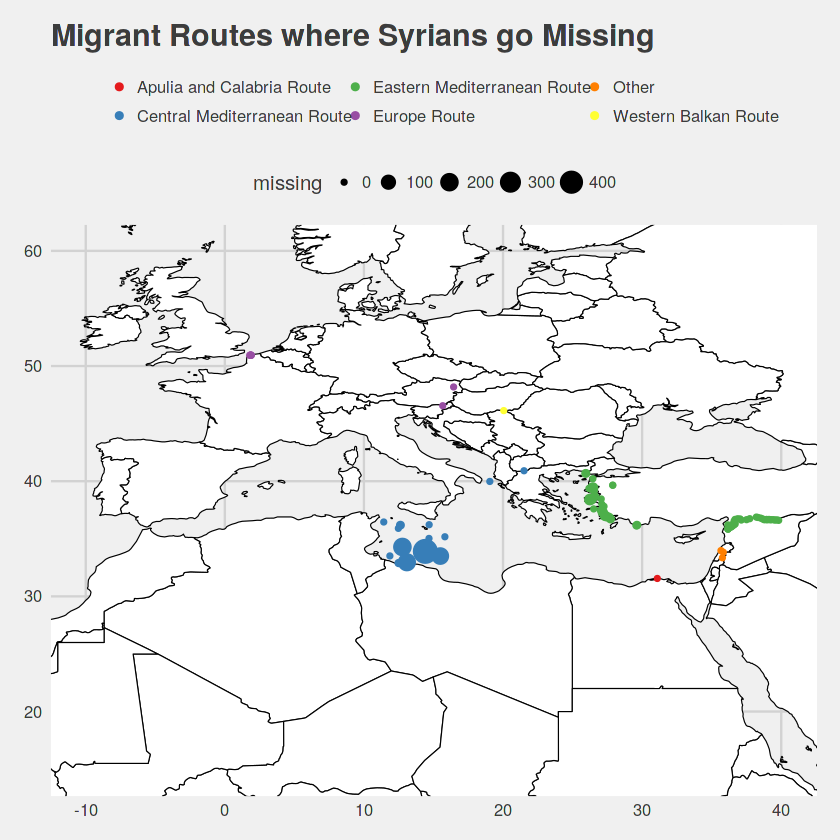

In [1]:
missing_syrians <- subset(df, syrian == 'TRUE')
syrians <- map + geom_point(aes(x = lon, y = lat, aplpha=0.5, col=factor(route), size=missing), data = missing_syrians) +
    theme_fivethirtyeight() + 
    scale_color_brewer(name='',palette='Set1') + 
    theme(legend.position='top') + 
    xlab('') + ylab('') + xlim(-10,40) + ylim(15,60) +
    ggtitle('Migrant Routes where Syrians go Missing')

syrians

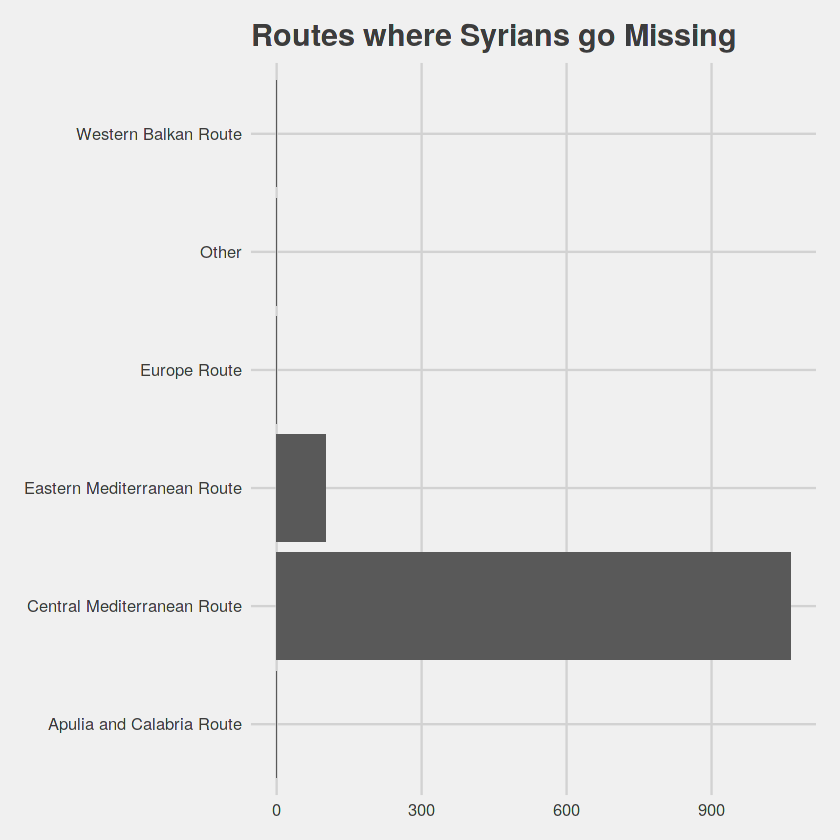

In [1]:
ggplot(missing_syrians, aes(x=route, y=missing)) +
     geom_bar(stat = 'identity') +
     theme_fivethirtyeight() + 
     coord_flip() +
     ggtitle("Routes where Syrians go Missing") 


### Now look at deadly migrant routes for Syrians 

Warning message:
“Ignoring unknown aesthetics: aplpha”

Warning message:
“Removed 10 rows containing missing values (geom_point).”

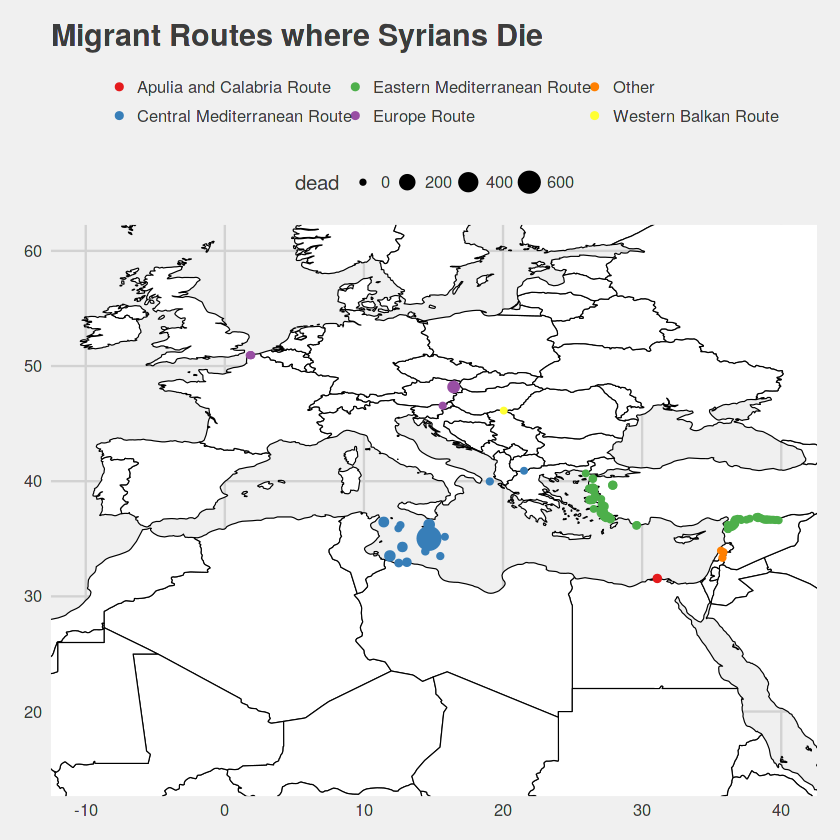

In [1]:
dead_syrians <- subset(df, syrian == 'TRUE')
deaths_syrians <- map + geom_point(aes(x = lon, y = lat, aplpha=0.5, col=factor(route), size=dead), data = dead_syrians) +
    theme_fivethirtyeight() + 
    scale_color_brewer(name='',palette='Set1') + 
    theme(legend.position='top') + 
    xlab('') + ylab('') + xlim(-10,40) + ylim(15,60) +
    ggtitle('Migrant Routes where Syrians Die')

deaths_syrians

### The most common cause of death for Syrian Migrants is Drowning.  

Below we look at the common causes of deaths for Syrian Migrants heading to Europe.  It appears most of these migrants die due to drowning on the Central Mediterranean route.  This is clearly the most dangerous route for Syrians heading to Europe.  

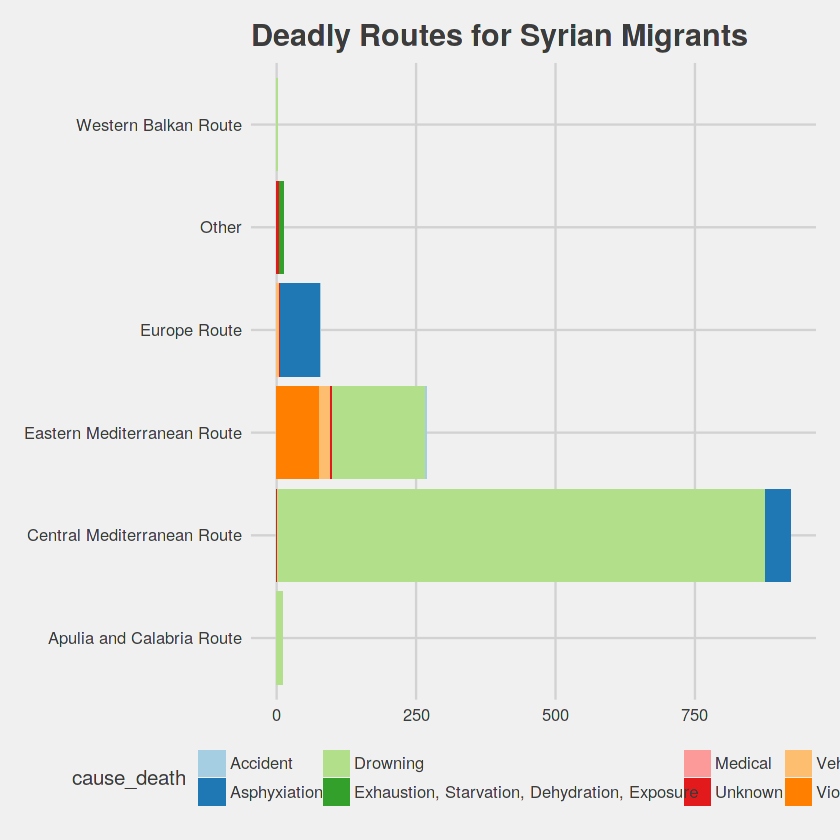

In [1]:
ggplot(data=dead_syrians, aes(x=route, y=dead, fill=cause_death)) +
  geom_bar(stat="identity")+
  scale_fill_brewer(palette="Paired")+
  theme_fivethirtyeight() + 
  coord_flip() +
  theme(legend.position='bottom') + 
  ggtitle("Deadly Routes for Syrian Migrants") 

### Violence is a major cause of death along the Turkish Syrian Border. 

Warning message:
“Ignoring unknown aesthetics: aplpha”

Warning message:
“Removed 10 rows containing missing values (geom_point).”

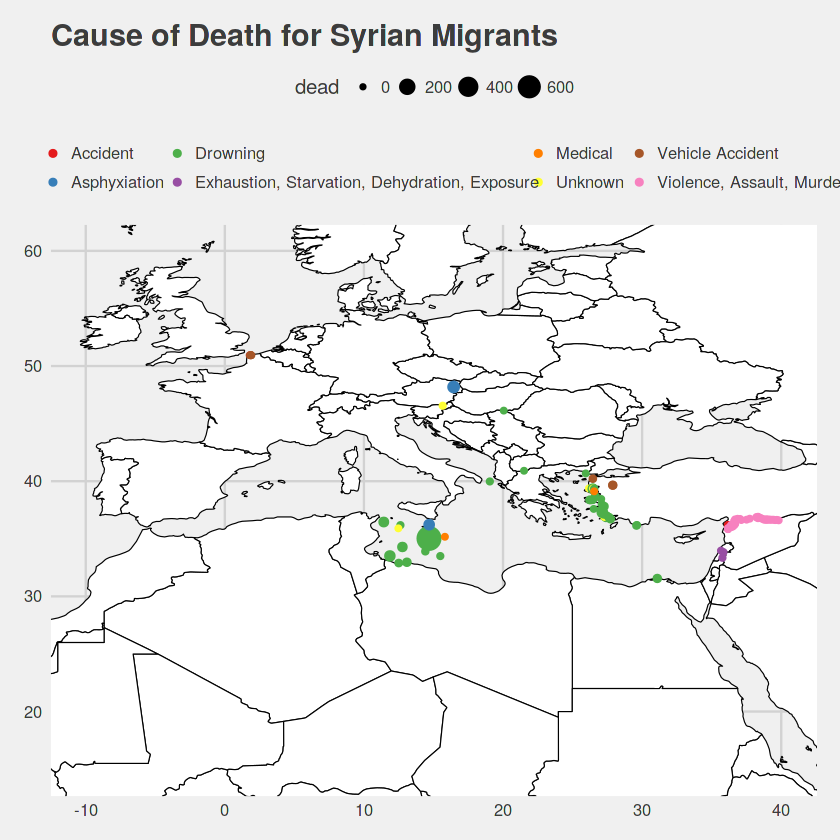

In [1]:
cod_syrians <- map + geom_point(aes(x = lon, y = lat, aplpha=0.5, col=factor(cause_death), size=dead), data = dead_syrians) +
    theme_fivethirtyeight() + 
    scale_color_brewer(name='',palette='Set1') + 
    theme(legend.position='top') + 
    xlab('') + ylab('') + xlim(-10,40) + ylim(15,60) +
    ggtitle('Cause of Death for Syrian Migrants')

cod_syrians

### Key Findings 

 1. The Central Mediterranean Route and the Eastern Mediterranean Route are the most dangerous migration routes for Syrians heading to Europe
 2. The most common cause of death for Syrian migrants is drowning 
 3. Violence is a common cause of death for Syrians along the Turkish/Syrian Border 
 4. 20 percent of migrant deaths are Syrian 

